# Mixed layer heat budget analysis of ACCESS-OM2 runs

This notebook contains a quick analysis of the mixed layer heat budget in ACCESS-OM2, using online heat budget diagnostics.

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cftime
from datetime import datetime

import cmocean as cm
import sys, os

from dask.distributed import Client
client = Client(processes=False)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39985 instead
  warnings.warn(


In [2]:
# Load workers:
client = Client(n_workers=16)
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38369 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/38369/status,
Dashboard: /proxy/38369/status,Workers: 16
Total threads: 32,Total memory: 251.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40049,Workers: 16
Dashboard: /proxy/38369/status,Total threads: 32
Started: Just now,Total memory: 251.19 GiB
Comm: tcp://127.0.0.1:39019,Total threads: 2
Dashboard: /proxy/45073/status,Memory: 15.70 GiB
Nanny: tcp://127.0.0.1:44695,


In [3]:
%%time
reg = [-100, 20, 0, 70] # Zhi's North Atlantic region


from matplotlib import gridspec

# import mixed layer temperature tendencies
mlt_tendency_from_snap      = xr.open_mfdataset('/g/data/e14/mv7494/NASST_data/mon_budgets_era5_mlt_tendency_from_snap/' + 'full_mixed_layer_heat_budget_year_2023.nc').mlt_tendency
mlt_tendency_clim_from_snap = xr.open_mfdataset('/g/data/e14/mv7494/NASST_data/mon_budgets_era5_mlt_tendency_from_snap/' + 'full_mixed_layer_heat_budget_climatology.nc').mlt_tendency

sst_from_snap          = xr.open_mfdataset('/g/data/e14/rmh561/access-om2/archive/025deg_era5_iaf_1958cycle1/output065/ocean/' + 'ocean_snapshot.nc'
                                          ).temp[:,0,:,:].sel(xt_ocean=slice(reg[0],reg[1]),yt_ocean=slice(reg[2],reg[3]))
sst_clim_from_snap     = xr.open_mfdataset('/g/data/e14/rmh561/access-om2/archive/025deg_era5_iaf_1958cycle1/output*/ocean/' + 'ocean_snapshot.nc'
                                          ).temp[276:(276+12*30),0,:,:].sel(xt_ocean=slice(reg[0],reg[1]),yt_ocean=slice(reg[2],reg[3])).groupby('time.month').mean('time')

CPU times: user 9.86 s, sys: 2.83 s, total: 12.7 s
Wall time: 12.9 s


CPU times: user 16 s, sys: 977 ms, total: 16.9 s
Wall time: 16.8 s


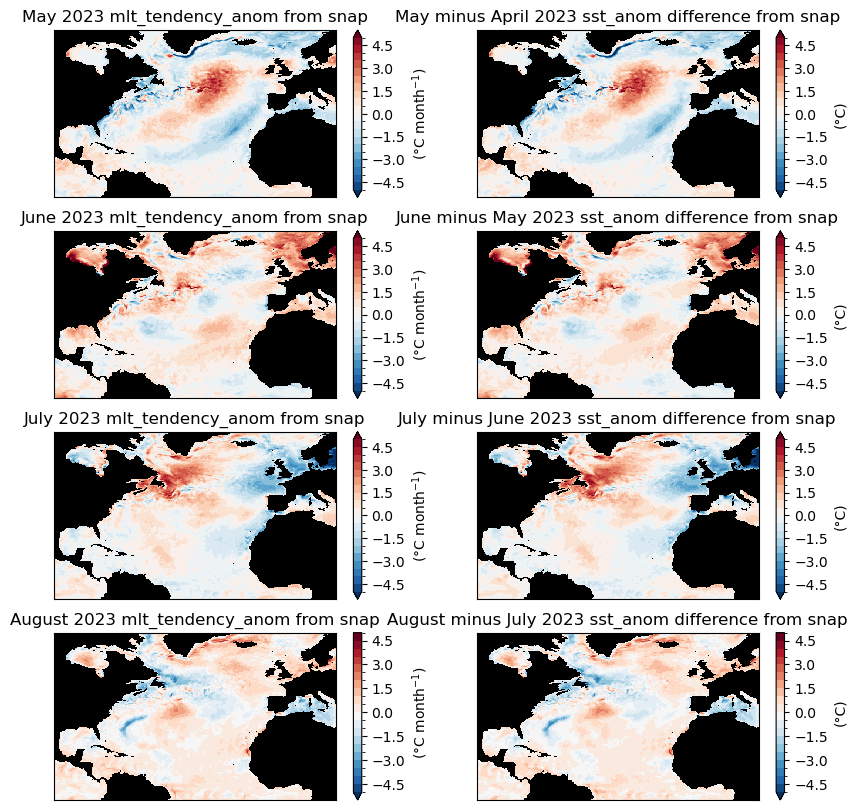

In [7]:
%%time
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
plt.figure(figsize=(10,10)); gs = gridspec.GridSpec(4,2) 
for f in [4,5,6,7]: # loop through May-August
    # --------------------------------------------------------------------- #
    ax = plt.subplot(gs[f-4,0])
    ((mlt_tendency_from_snap[f,:,:]-mlt_tendency_clim_from_snap[f,:,:])*(60*60*24*30.5)).plot(levels=np.linspace(-5,5,21), cbar_kwargs={'label': '(°C month$^{-1}$)'})
    plt.title(months[f] + ' 2023 mlt_tendency_anom from snap')
    plt.ylabel(None); plt.xlabel(None); ax.set_facecolor('k'); plt.xticks([]); plt.yticks([])

    # --------------------------------------------------------------------- #
    ax = plt.subplot(gs[f-4,1]) # plot SST anoms
    # e.g., SST anoms from 2023-05-30 - 2023-04-29
    ((sst_from_snap[f,:,:]-sst_clim_from_snap[f,:,:]) - (sst_from_snap[f-1,:,:]-sst_clim_from_snap[f-1,:,:])).plot(levels=np.linspace(-5,5,21), cbar_kwargs={'label': '(°C)'})
    plt.title(months[f] + ' minus ' + months[f-1] + ' 2023 sst_anom difference from snap')
    plt.ylabel(None); plt.xlabel(None); ax.set_facecolor('k'); plt.xticks([]); plt.yticks([])
# Wall time: 19.3 s

In [5]:
YES!

SyntaxError: invalid syntax (1491580034.py, line 1)